In [23]:
from skimage import io 
from skimage.color import rgb2gray
from matplotlib import pyplot as plt

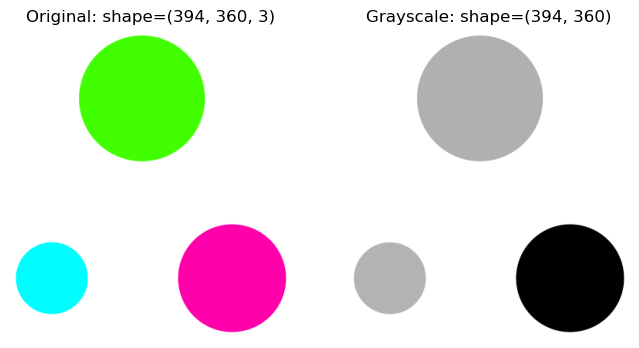

In [7]:
img_original = io.imread('three-circles.png')
img_grey = rgb2gray(img_original) #package to convert to gray scale

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax_original, ax_grey = ax

ax_original.imshow(img_original)
ax_original.set_title(f'Original: shape={img_original.shape}')

ax_grey.imshow(img_grey, cmap='gray')
ax_grey.set_title(f'Grayscale: shape={img_grey.shape}')

for a in ax.flat:
    a.axis('off')

In [24]:
from skimage.filters import threshold_otsu, threshold_yen

img_original = io.imread('three-circles.png')
img_grey = rgb2gray(img_original)

print(f'{threshold_otsu (img_grey)=}') #added f string
print(f'{threshold_yen(img_grey)=}') 

threshold_otsu (img_grey)=0.5999550130208333
threshold_yen(img_grey)=0.9956673828125001


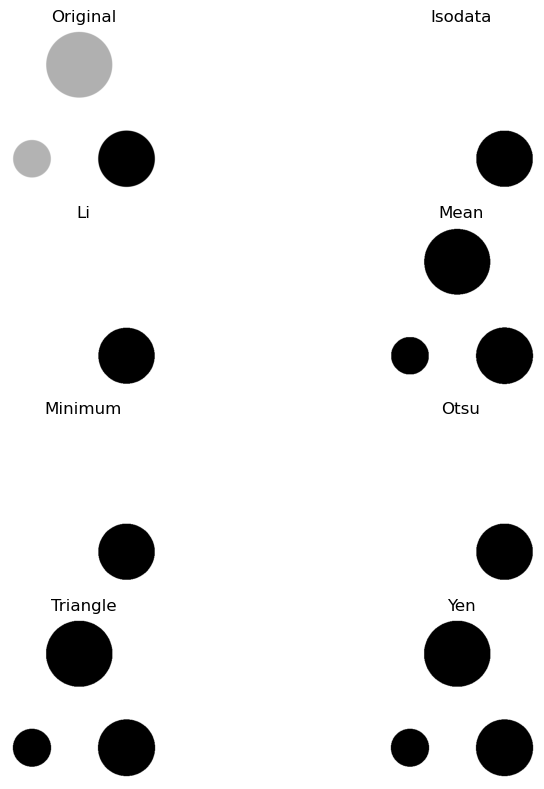

In [25]:
from skimage.filters import try_all_threshold  #trying all types of threshold

fig, ax = try_all_threshold(img_grey, figsize=(10, 8), verbose=False)
plt.show()
#yen appears best

Text(0.5, 1.0, 'Binarised (Using Otsu)')

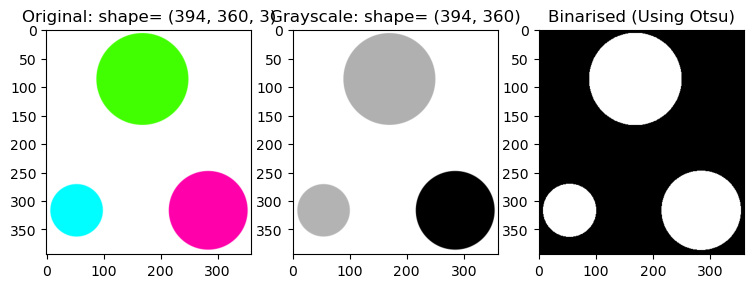

In [26]:
#binarising image into int
threshold = threshold_yen(img_grey)
img_binarised = img_grey < threshold #removing away the background

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
ax_original, ax_grey, ax_binarised = ax

ax_original.imshow(img_original)
ax_original.set_title(f'Original: shape= {img_original.shape}')

ax_grey.imshow(img_grey, cmap='gray')
ax_grey.set_title(f'Grayscale: shape= {img_grey.shape}')

ax_binarised.imshow(img_binarised, cmap='gray')
ax_binarised.set_title(f'Binarised (Using Otsu)')

Text(0.5, 1.0, 'Labelled Objects')

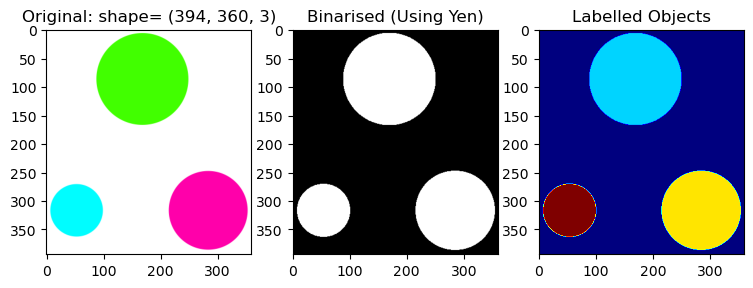

In [29]:
# measure.label() requires an image of type in
img_labelled = skimage.measure.label(img_binarised.astype('uint8')) #pulling directly from skimage package
#labelling linked empty spaces with integer, which can be masked downstream

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
ax_original, ax_binarised, ax_labelled = ax

ax_original.imshow(img_original)
ax_original.set_title(f'Original: shape= {img_original.shape}')

ax_binarised.imshow(img_binarised, cmap='gray')
ax_binarised.set_title(f'Binarised (Using Yen)')

# Using jet to colour the different regions
ax_labelled.imshow(img_labelled, cmap='jet')
ax_labelled.set_title(f'Labelled Objects')

#labels are 1 - 3, with 1 having the highest pixels.

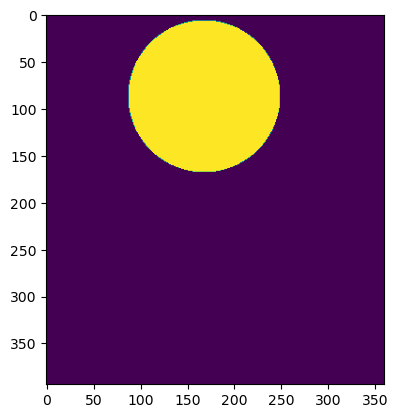

In [30]:
img_masked = img_labelled == 1
plt.imshow(img_masked)

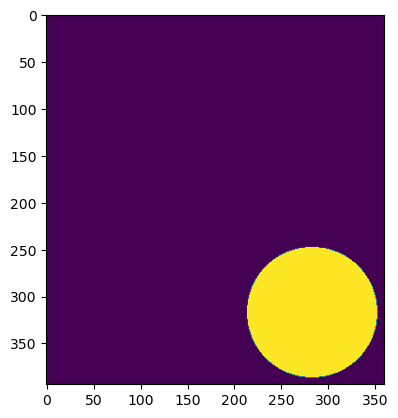

In [31]:
img_masked = img_labelled == 2
plt.imshow(img_masked)

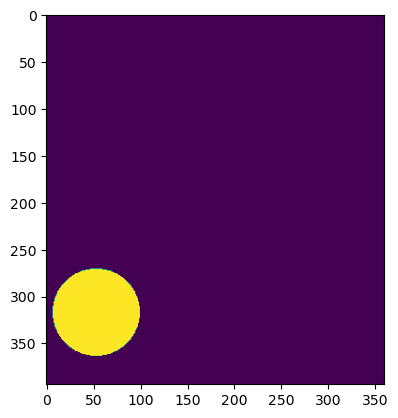

In [32]:
img_masked = img_labelled == 3
plt.imshow(img_masked)

In [34]:
# measure.label() requires an image of type int
img_labelled = skimage.measure.label(img_binarised.astype('uint8')) #calling our binarised images
region_info = skimage.measure.regionprops(img_labelled) #compute image properties and return as pandas-compatible table

no_of_regions = len(region_info)

for count, region in enumerate(region_info):
    print('-'*10, f'Region {count}', '-'*10)
    print(f'Centre\t: {region.centroid}') #getting individual centres of each img
    print(f'Area\t: {region.area}') # number of pixels of region by pixel-area
    print(f'Perimeter\t: {region.perimeter}') #TOTAL perimeter in ALL binary images, 1-3
    print('\n')

---------- Region 0 ----------
Centre	: (87.0, 168.0)
Area	: 20565.0
Perimeter	: 532.2152954766494


---------- Region 1 ----------
Centre	: (317.0, 283.0)
Area	: 15193.0
Perimeter	: 458.2741699796952


---------- Region 2 ----------
Centre	: (317.0, 53.0)
Area	: 6793.0
Perimeter	: 304.73506473629425


